In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d senaca/mimii-pump-sound-dataset

100% 945M/948M [00:28<00:00, 33.8MB/s]
100% 948M/948M [00:28<00:00, 34.3MB/s]


In [ ]:
zip_path='/content/mimii-pump-sound-dataset.zip'

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
      zip_ref.extract(member)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing
import sys
import random

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
plt.style.use('ggplot')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
blue, red = colors[1], colors[5]

In [ ]:
normal = r'/content/drive/MyDrive/IoT/normal/00000000.wav'
ipd.Audio(normal)

In [ ]:
abnormal = r"/content/drive/MyDrive/IoT/abnormal/00000000.wav"
ipd.Audio(abnormal)

The signals have a (220500,) shape.


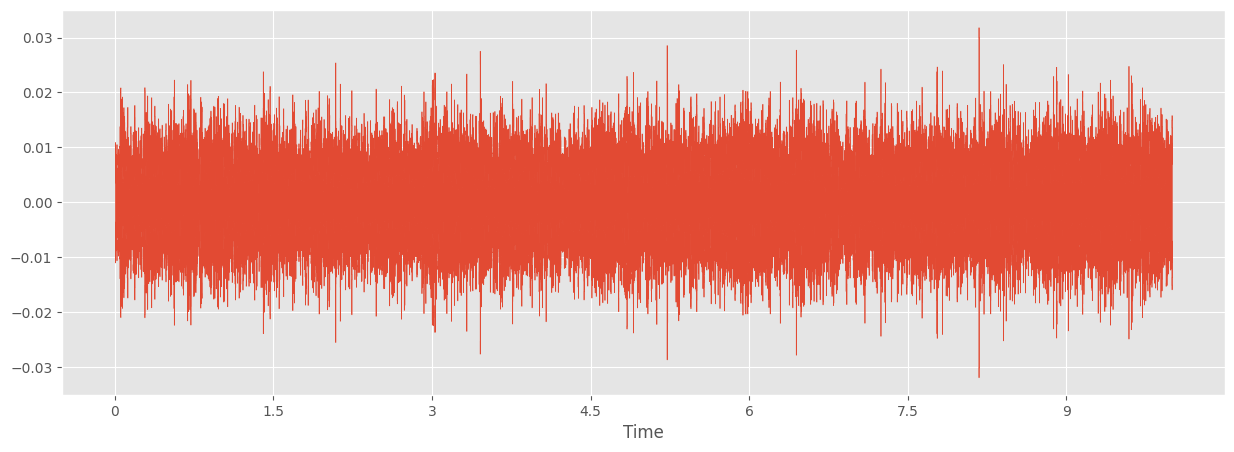

In [ ]:
#plotting normal data
plt.figure(figsize=(15,5))
data_normal,sr_normal = librosa.load(normal)
librosa.display.waveshow(data_normal,sr=sr_normal)
print(f'The signals have a {data_normal.shape} shape.')

The signals have a (220500,) shape.


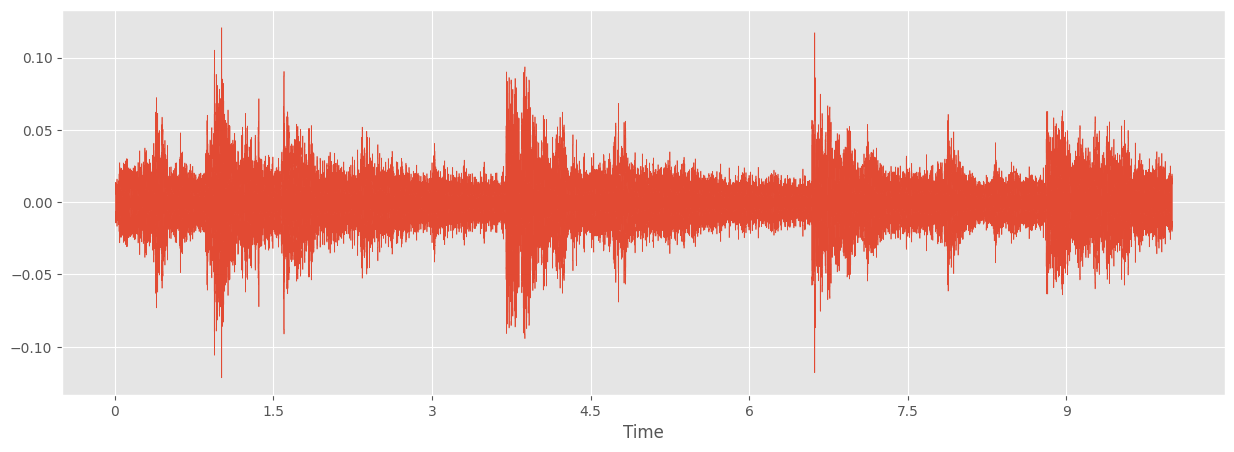

In [ ]:
#plotting abnormal data
plt.figure(figsize=(15,5))
data_abnormal,sr_abnormal = librosa.load(abnormal)
librosa.display.waveshow(data_abnormal,sr=sr_abnormal)
print(f'The signals have a {data_abnormal.shape} shape.')

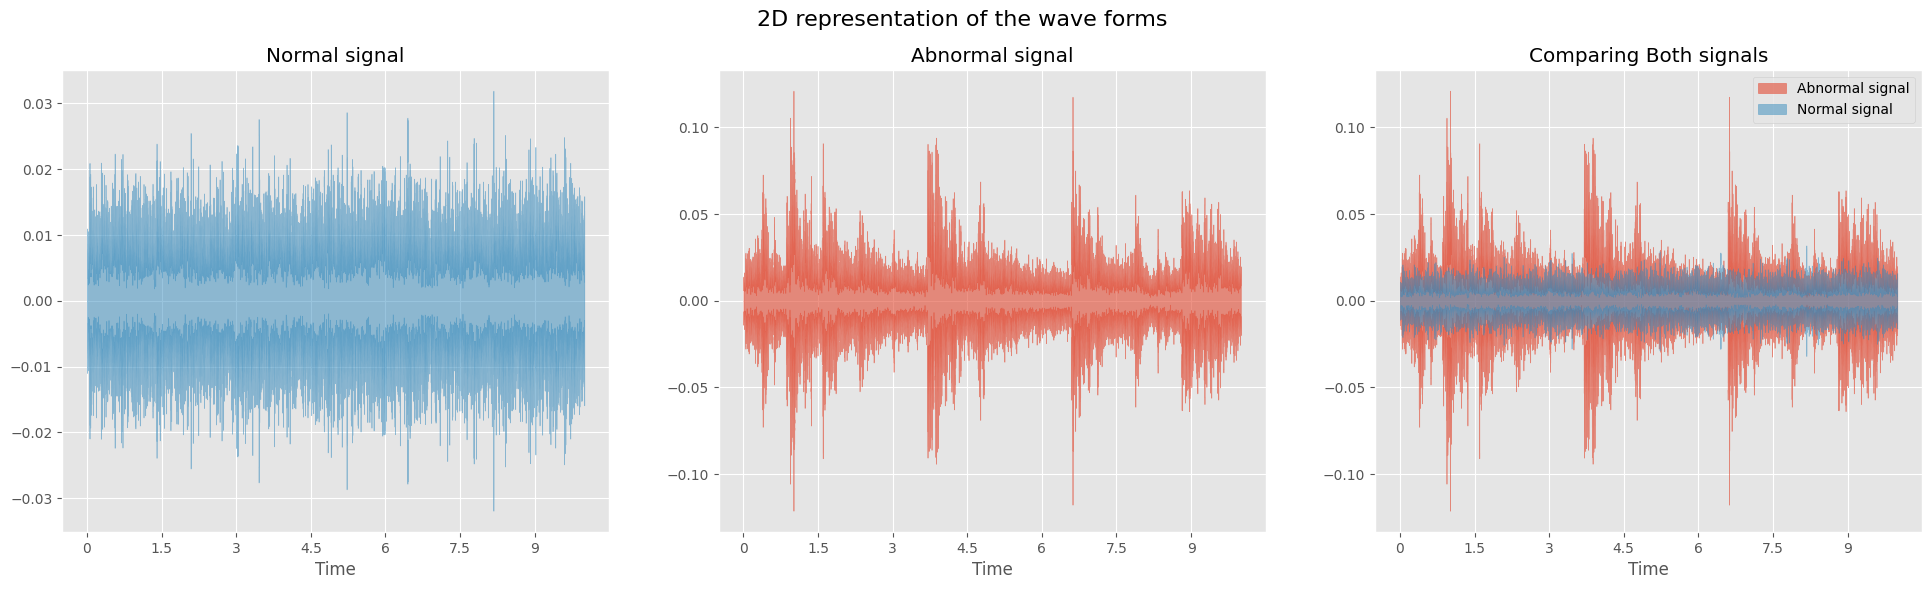

In [ ]:
fig = plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
librosa.display.waveshow(data_normal, sr=sr_normal, alpha=0.5, color=blue, linewidth=0.5, label='Normal signal')
plt.title('Normal signal')

plt.subplot(1,3,2)
librosa.display.waveshow(data_abnormal, sr=sr_abnormal, alpha=0.6, linewidth=0.5, label='Abnormal signal')
plt.title('Abnormal signal')

plt.subplot(1,3,3)
librosa.display.waveshow(data_abnormal, sr=sr_abnormal, alpha=0.6, linewidth=0.5, label='Abnormal signal')
librosa.display.waveshow(data_normal, sr=sr_normal, alpha=0.5, linewidth=0.5, label='Normal signal')
plt.title('Comparing Both signals')

fig.suptitle('2D representation of the wave forms', fontsize=16)
plt.legend();



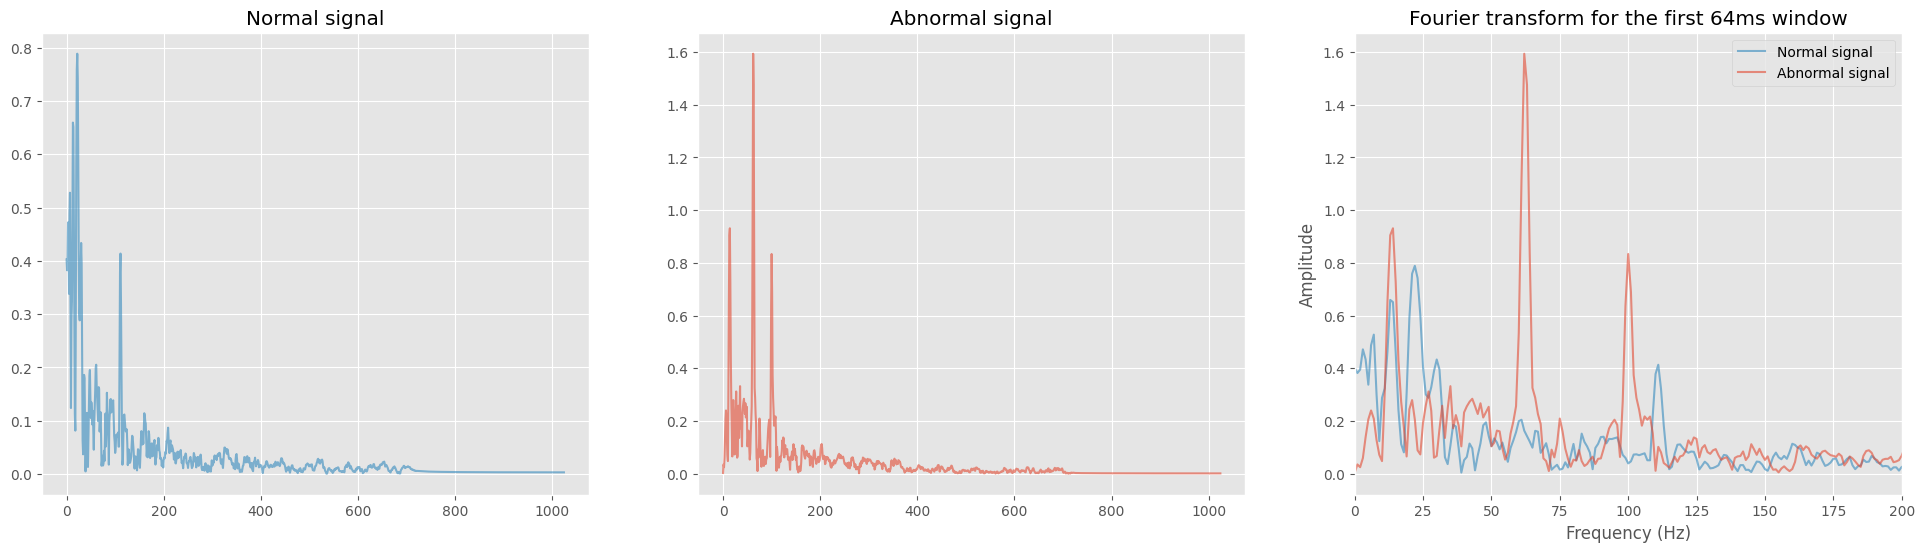

In [ ]:
n_fft = 2048
D_normal = np.abs(librosa.stft(data_normal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))
D_abnormal = np.abs(librosa.stft(data_abnormal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1))

fig = plt.figure(figsize=(24, 6))
plt.subplot(1,3,1)
plt.plot(D_normal, color=blue, alpha=0.6, label='Normal signal');
plt.title('Normal signal')

plt.subplot(1,3,2)
plt.plot(D_abnormal, alpha=0.6, label='Abnormal signal');
plt.title('Abnormal signal')

plt.subplot(1,3,3)
plt.plot(D_normal, color=blue, alpha=0.6, label='Normal signal');
plt.plot(D_abnormal, alpha=0.6, label='Abnormal signal');
plt.title('Fourier transform for the first 64ms window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 200);

In [ ]:
def get_magnitude_scale(file, n_fft=1024, hop_length=512):
    """
       dB (ndarray) - returns the log scaled amplitude of the sound file
    """
    # Load the sound data:
    signal, sampling_rate = librosa.load(file)

    # Compute the short-time Fourier transform of the signal:
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

    # Map the magnitude to a decibel scale:
    dB = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    return dB

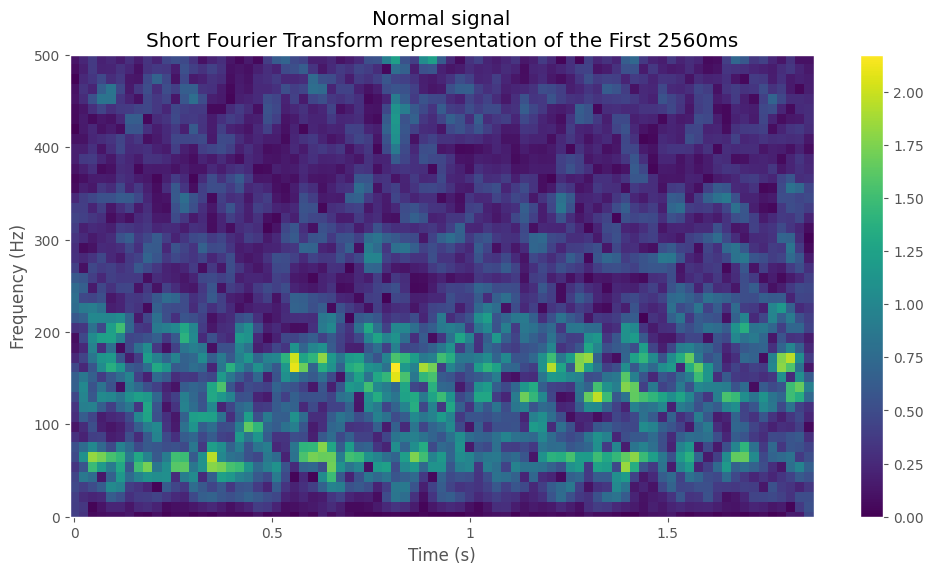

In [ ]:
D_normal = np.abs(librosa.stft(data_normal[:20*n_fft], n_fft=n_fft, hop_length=512))

dB_normal = get_magnitude_scale(normal)

fig = plt.figure(figsize=(12, 6))
librosa.display.specshow(D_normal, sr=sr_normal, x_axis='time', y_axis='linear', cmap='viridis');
plt.title('Normal signal\nShort Fourier Transform representation of the First 2560ms')
plt.ylim(0, 500)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

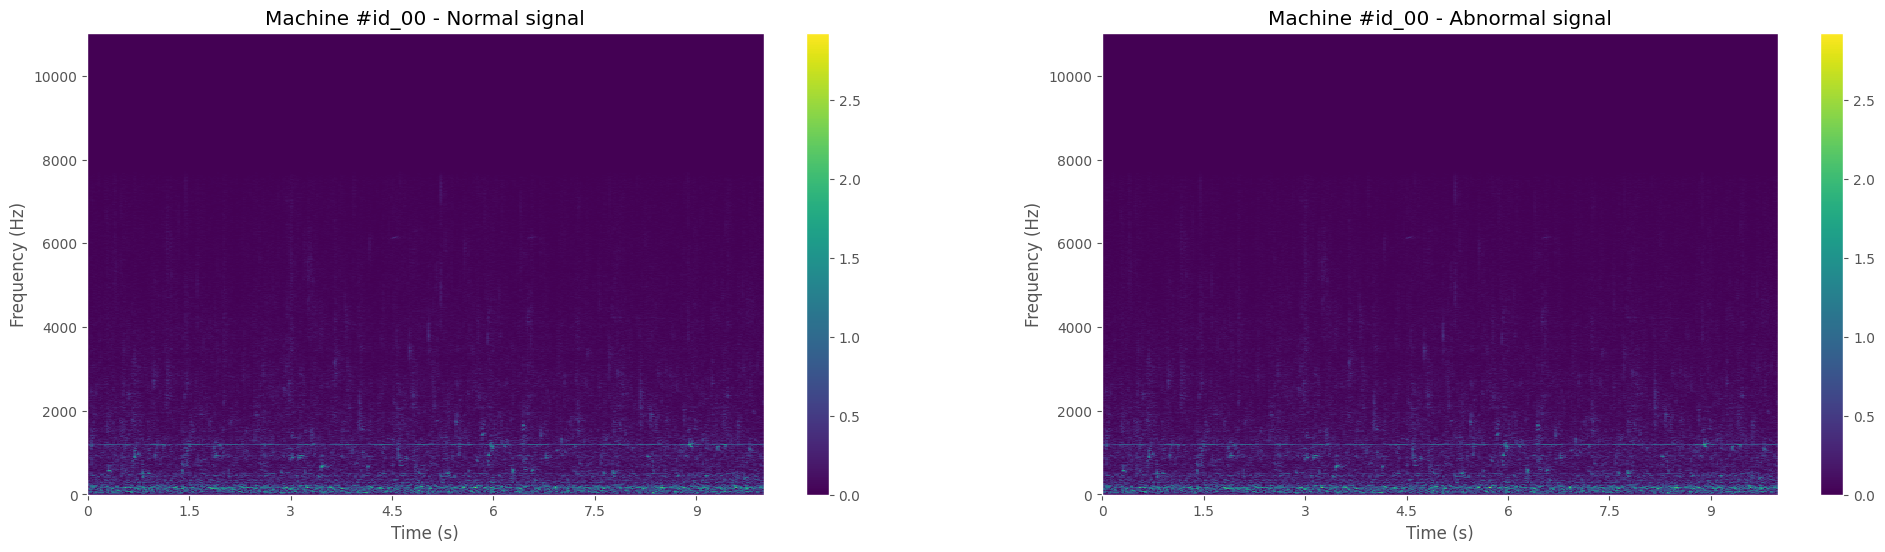

In [ ]:
D_normal = np.abs(librosa.stft(data_normal, n_fft=n_fft, hop_length=512))
D_abnormal = np.abs(librosa.stft(data_normal, n_fft=n_fft, hop_length=512))

fig = plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(D_normal, sr=sr_normal, x_axis='time', y_axis='linear', cmap='viridis');
plt.title('Machine #id_00 - Normal signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar();

plt.subplot(1, 2, 2)
librosa.display.specshow(D_abnormal, sr=sr_abnormal, x_axis='time', y_axis='linear', cmap='viridis');
plt.title('Machine #id_00 - Abnormal signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar();



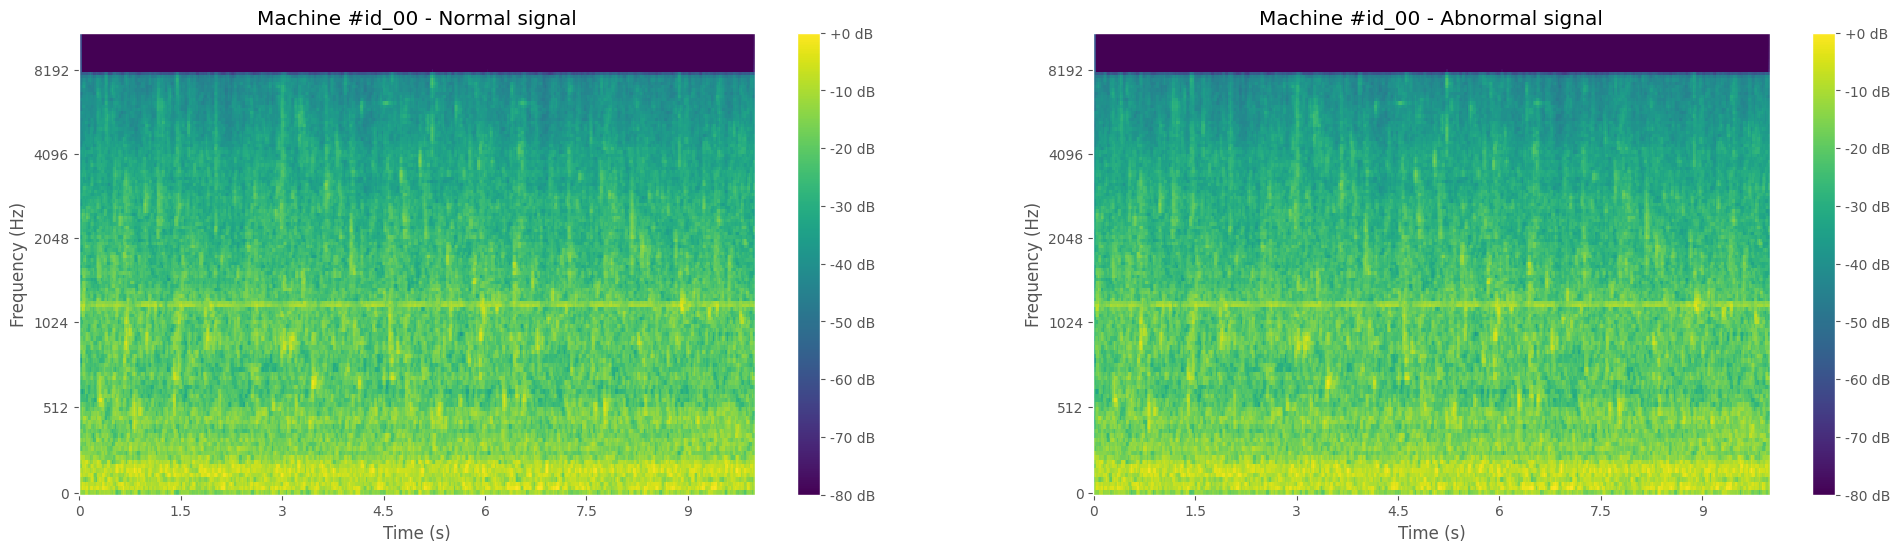

In [ ]:
normal_mel = librosa.feature.melspectrogram(y=data_normal, sr=sr_normal)
normal_S_DB = librosa.power_to_db(normal_mel, ref=np.max)
abnormal_mel = librosa.feature.melspectrogram(y=data_normal, sr=sr_normal)
abnormal_S_DB = librosa.power_to_db(abnormal_mel, ref=np.max)

fig = plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(normal_S_DB, sr=sr_normal, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis');
plt.title('Machine #id_00 - Normal signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB');

plt.subplot(1, 2, 2)
librosa.display.specshow(abnormal_S_DB, sr=sr_abnormal, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis');
plt.title('Machine #id_00 - Abnormal signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB');

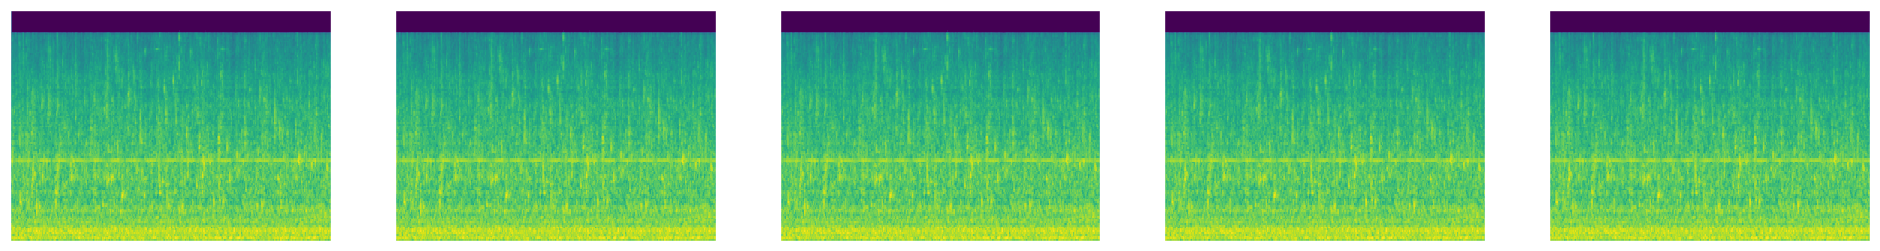

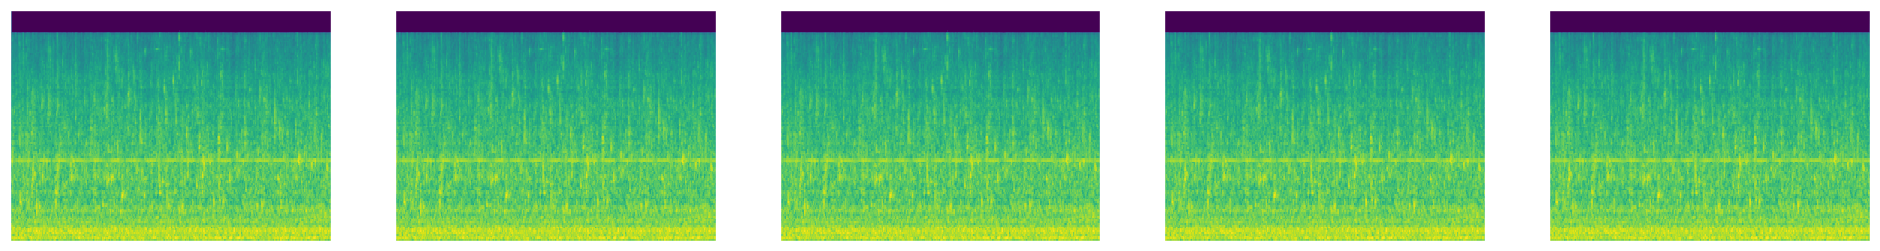

In [ ]:
n_mels = 128
hop_length = 512
sr = sr_normal

frames = 5
stride = 1
dims = frames * n_mels

features_vector_size = normal_S_DB.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t: n_mels * (t + 1)] = normal_S_DB[:, t:t + features_vector_size].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(features[:, n_mels * t: n_mels * (t + 1)].T, sr=sr, hop_length=hop_length, cmap='viridis');

features_vector_size = abnormal_S_DB.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t: n_mels * (t + 1)] = abnormal_S_DB[:, t:t + features_vector_size].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(features[:, n_mels * t: n_mels * (t + 1)].T, sr=sr, hop_length=hop_length, cmap='viridis');
    #plt.colorbar(format='%+2.0f dB');



In [ ]:
def extract_signal_features(signal, sr, n_mels=64, frames=5, n_fft=1024, hop_length=512):
    """
    Extract features from a sound signal, given a sampling rate sr. This function
    computes the Mel spectrogram in log scales (getting the power of the signal).
    Then we build N frames (where N = frames passed as an argument to this function):

    PARAMS
    ======
        signal (array of floats) - numpy array as returned by load_sound_file()
        sr (integer) - sampling rate of the signal
        n_mels (integer) - number of Mel buckets (default: 64)
        frames (integer) - number of sliding windows to use to slice the Mel spectrogram
        n_fft (integer) - length of the windowed signal to compute the short Fourier transform on
        hop_length (integer) - window increment when computing STFT
    """

    # Compute a mel-scaled spectrogram:
    mel_spectrogram = librosa.feature.melspectrogram(
        y=signal,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )

    # Convert to decibel (log scale for amplitude):
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Generate an array of vectors as features for the current signal:
    features_vector_size = log_mel_spectrogram.shape[1] - frames + 1

    # Skips short signals:
    dims = frames * n_mels
    if features_vector_size < 1:
        return np.empty((0, dims), np.float32)

    # Build N sliding windows (=frames) and concatenate them to build a feature vector:
    features = np.zeros((features_vector_size, dims), np.float32)
    for t in range(frames):
        features[:, n_mels * t: n_mels * (t + 1)] = log_mel_spectrogram[:, t:t + features_vector_size].T

    return features

In [ ]:
signal,sr = librosa.load(normal)

features = extract_signal_features(
    signal,
    sr,
    n_mels=n_mels,
    frames=frames,
    n_fft=n_fft,
    hop_length=hop_length
)

features

array([[-13.747974 , -13.685217 , -13.445705 , ..., -80.       ,
        -80.       , -80.       ],
       [-13.189602 ,  -8.309021 ,  -9.186293 , ..., -80.       ,
        -80.       , -80.       ],
       [-13.750315 ,  -3.7822351,  -5.2143903, ..., -80.       ,
        -80.       , -80.       ],
       ...,
       [-21.84241  , -11.386324 , -12.073631 , ..., -80.       ,
        -80.       , -80.       ],
       [-16.8921   , -10.216541 ,  -9.607878 , ..., -80.       ,
        -80.       , -80.       ],
       [-13.180183 ,  -3.619607 ,  -4.505159 , ..., -77.69948  ,
        -77.827286 , -77.90764  ]], dtype=float32)

In [ ]:
import os
from  glob import glob

In [ ]:
fileList=[]
for root, dirs, files in os.walk('/content/drive/MyDrive/IoT'):
    image_file = glob(os.path.join(root, '*.wav'))
    filtered_list = [s for s in image_file]

    if(filtered_list!=[]):
       fileList.append(filtered_list)
audioList=[item for sublist in fileList for item in sublist]

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], audioList))
print(audioList)
print(labels)


audio_path = pd.Series(audioList, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
# print(image_path)
# print(labels)

# Concatenate filepaths and labels
audio_df = pd.concat([audio_path, labels], axis=1)
# Shuffle the DataFrame and reset index
audio_df = audio_df.sample(frac=1).reset_index(drop = True)

['/content/drive/MyDrive/IoT/abnormal/00000000.wav', '/content/drive/MyDrive/IoT/abnormal/00000009.wav', '/content/drive/MyDrive/IoT/abnormal/00000005.wav', '/content/drive/MyDrive/IoT/abnormal/00000007.wav', '/content/drive/MyDrive/IoT/abnormal/00000001.wav', '/content/drive/MyDrive/IoT/abnormal/00000002.wav', '/content/drive/MyDrive/IoT/abnormal/00000003.wav', '/content/drive/MyDrive/IoT/abnormal/00000008.wav', '/content/drive/MyDrive/IoT/abnormal/00000004.wav', '/content/drive/MyDrive/IoT/abnormal/00000006.wav', '/content/drive/MyDrive/IoT/abnormal/00000016.wav', '/content/drive/MyDrive/IoT/abnormal/00000037.wav', '/content/drive/MyDrive/IoT/abnormal/00000027.wav', '/content/drive/MyDrive/IoT/abnormal/00000012.wav', '/content/drive/MyDrive/IoT/abnormal/00000018.wav', '/content/drive/MyDrive/IoT/abnormal/00000031.wav', '/content/drive/MyDrive/IoT/abnormal/00000045.wav', '/content/drive/MyDrive/IoT/abnormal/00000017.wav', '/content/drive/MyDrive/IoT/abnormal/00000028.wav', '/content/d

In [ ]:
audio_df.shape

(519, 2)

In [ ]:
audio = []
label = []

num = len(audioList)
count = 0
for i in audioList:
    print(str(count)+'/'+str(num),end='r')
    audio.append(i)
    label.append(i.split('/')[-2])
    count=count+1
trainingset = np.asarray(audio)
traininglabels = pd.DataFrame(label)

0/519r1/519r2/519r3/519r4/519r5/519r6/519r7/519r8/519r9/519r10/519r11/519r12/519r13/519r14/519r15/519r16/519r17/519r18/519r19/519r20/519r21/519r22/519r23/519r24/519r25/519r26/519r27/519r28/519r29/519r30/519r31/519r32/519r33/519r34/519r35/519r36/519r37/519r38/519r39/519r40/519r41/519r42/519r43/519r44/519r45/519r46/519r47/519r48/519r49/519r50/519r51/519r52/519r53/519r54/519r55/519r56/519r57/519r58/519r59/519r60/519r61/519r62/519r63/519r64/519r65/519r66/519r67/519r68/519r69/519r70/519r71/519r72/519r73/519r74/519r75/519r76/519r77/519r78/519r79/519r80/519r81/519r82/519r83/519r84/519r85/519r86/519r87/519r88/519r89/519r90/519r91/519r92/519r93/519r94/519r95/519r96/519r97/519r98/519r99/519r100/519r101/519r102/519r103/519r104/519r105/519r106/519r107/519r108/519r109/519r110/519r111/519r112/519r113/519r114/519r115/519r116/519r117/519r118/519r119/519r120/519r121/519r122/519r123/519r124/519r125/519r126/519r127/519r128/519r129/519r130/519r131/519r132/519r133/519r134/519r135/519r136/519r137/519r138/51

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Classes['abnormal' 'normal']
2


<Axes: >

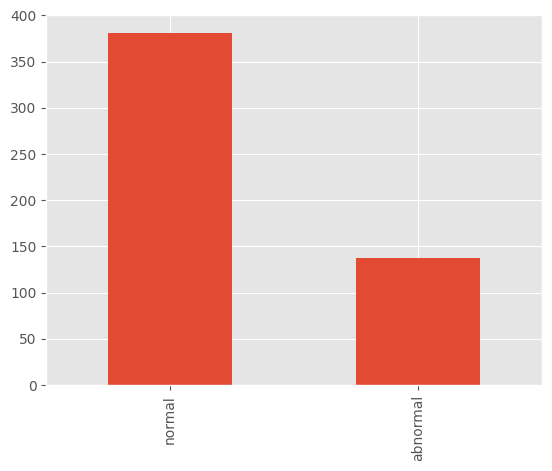

In [ ]:
encoder = LabelEncoder()
encoder.fit(traininglabels[0])
print('Classes'+str(encoder.classes_))
encodedlabels = encoder.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
traininglabels[0].value_counts().plot(kind='bar')

In [ ]:
clearalllabels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainingset.shape

(519,)

In [ ]:
clearalllabels.shape

(519, 2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(trainingset,clearalllabels,test_size=0.1,random_state=42,stratify=clearalllabels)

In [ ]:
def extract_features(data):
  Features=[]
  for i in data:
    signal,sr = librosa.load(i)
    feature = extract_signal_features(
    signal,
    sr,
    n_mels=n_mels,
    frames=frames,
    n_fft=n_fft,
    hop_length=hop_length
    )
    Features.append(feature)
  return Features



In [ ]:
x_train_f=np.array(extract_features(x_train))

In [ ]:
x_test_f=np.array(extract_features(x_test))

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report


In [ ]:
nsamples, nx, ny = x_train_f.shape
x_train_final = x_train_f.reshape((nsamples,nx*ny))

nsamples, nx, ny=x_test_f.shape
x_test_final = x_test_f.reshape((nsamples,nx*ny))

# Convert back to 1D array
y_train_final = np.argmax(y_train, axis=1)
y_test_final = np.argmax(y_test, axis=1)

In [ ]:
# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(x_train_final,y_train_final)


# make predictions on test set
y_pred_default=svc.predict(x_test_final)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_default)))
print(classification_report(y_pred_default, y_test_final))

Model accuracy score with default hyperparameters: 0.8846

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.97      0.88      0.93        42

    accuracy                           0.88        52
   macro avg       0.81      0.89      0.84        52
weighted avg       0.91      0.88      0.89        52



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_final, y_pred_default)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 9  5]
 [ 1 37]]

True Positives(TP) =  9

True Negatives(TN) =  37

False Positives(FP) =  5

False Negatives(FN) =  1


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)

# fit classifier to training set
svc.fit(x_train_final,y_train_final)


# make predictions on test set
y_pred_default_100=svc.predict(x_test_final)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_default_100)))
print(classification_report(y_pred_default_100, y_test_final))

Model accuracy score with rbf kernel and C=100.0 : 0.9231

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.97      0.93      0.95        40

    accuracy                           0.92        52
   macro avg       0.88      0.92      0.90        52
weighted avg       0.93      0.92      0.93        52



In [ ]:
cm = confusion_matrix(y_test_final, y_pred_default_100)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  3]
 [ 1 37]]

True Positives(TP) =  11

True Negatives(TN) =  37

False Positives(FP) =  3

False Negatives(FN) =  1


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)

# fit classifier to training set
linear_svc.fit(x_train_final,y_train_final)


# make predictions on test set
y_pred_linear1=linear_svc.predict(x_test_final)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_linear1)))
print(classification_report(y_pred_linear1, y_test_final))

Model accuracy score with linear kernel and C=1.0 : 0.9423

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.93      0.96        41

    accuracy                           0.94        52
   macro avg       0.89      0.96      0.92        52
weighted avg       0.95      0.94      0.94        52



In [ ]:
cm = confusion_matrix(y_test_final, y_pred_linear1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  3]
 [ 0 38]]

True Positives(TP) =  11

True Negatives(TN) =  38

False Positives(FP) =  3

False Negatives(FN) =  0


In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x_train_final, y_train_final)


# Predict the Test set results

y_pred_rf_default = rfc.predict(x_test_final)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_rf_default)))
print(classification_report(y_pred_rf_default, y_test_final))

Model accuracy score with 10 decision-trees : 0.8846

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.97      0.88      0.93        42

    accuracy                           0.88        52
   macro avg       0.81      0.89      0.84        52
weighted avg       0.91      0.88      0.89        52



In [ ]:
cm = confusion_matrix(y_test_final, y_pred_rf_default)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 9  5]
 [ 1 37]]

True Positives(TP) =  9

True Negatives(TN) =  37

False Positives(FP) =  5

False Negatives(FN) =  1


In [ ]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc_100.fit(x_train_final, y_train_final)



# Predict on the test set results

y_pred_rf_100 = rfc_100.predict(x_test_final)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_rf_100)))
print(classification_report(y_pred_rf_100, y_test_final))

Model accuracy score with 100 decision-trees : 0.8846

              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.97      0.88      0.93        42

    accuracy                           0.88        52
   macro avg       0.81      0.89      0.84        52
weighted avg       0.91      0.88      0.89        52



In [ ]:
cm = confusion_matrix(y_test_final, y_pred_rf_100)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 9  5]
 [ 1 37]]

True Positives(TP) =  9

True Negatives(TN) =  37

False Positives(FP) =  5

False Negatives(FN) =  1


In [ ]:

# instantiate the model
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(x_train_final, y_train_final)

y_pred_knn_5 = knn_5.predict(x_test_final)

print('Model accuracy score: {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_knn_5)))
print(classification_report(y_pred_knn_5, y_test_final))

Model accuracy score: 0.9231

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.97      0.93      0.95        40

    accuracy                           0.92        52
   macro avg       0.88      0.92      0.90        52
weighted avg       0.93      0.92      0.93        52



In [ ]:
cm = confusion_matrix(y_test_final, y_pred_knn_5)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11  3]
 [ 1 37]]

True Positives(TP) =  11

True Negatives(TN) =  37

False Positives(FP) =  3

False Negatives(FN) =  1


In [ ]:
# instantiate the model
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(x_train_final, y_train_final)

y_pred_knn_6 = knn_6.predict(x_test_final)

print('Model accuracy score: {0:0.4f}\n'. format(accuracy_score(y_test_final, y_pred_knn_6)))
print(classification_report(y_pred_knn_6, y_test_final))

Model accuracy score: 0.9038

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.95      0.92      0.94        39

    accuracy                           0.90        52
   macro avg       0.87      0.88      0.87        52
weighted avg       0.91      0.90      0.91        52

